# 2. Intro to Catalyst

This tutorial has been adapted from the [Catalyst docs](https://docs.sciml.ai/Catalyst/stable/network_analysis/crn_theory/) (see also [here](https://docs.sciml.ai/Catalyst/stable/network_analysis/odes/)).

In [86]:
using Pkg
Pkg.activate(".")

  Activating project at `~/Documents/repos/JuliaTutorials`


In [88]:
using Catalyst
using LinearAlgebra
using Latexify

## Constructing CRN
Chemical reaction networks are created using the `@reaction_network` macro. Each line represents a reaction: the first entry is the rate parameter, and the second entry is the reaction stoichiometry.

The following is an example network from Shinar and Feinberg (2010).

In [93]:
rn = @reaction_network begin
    α, A + B --> 2B
    β, B --> A
end

Model ##ReactionSystem#336:
Unknowns (2): see unknowns(##ReactionSystem#336)
  A(t)
  B(t)
Parameters (2): see parameters(##ReactionSystem#336)
  α
  β

Note: use backslash `\` to type unicode characters e.g. `\beta<tab>` -> β

In [94]:
# Accessing network variables
@show species(rn)
@show parameters(rn)
@show reactions(rn)

# Basic properties
@show numspecies(rn)
@show numparams(rn)
@show numreactions(rn)

species(rn) = SymbolicUtils.BasicSymbolic{Real}[A(t), B(t)]
parameters(rn) = Any[α, β]
reactions(rn) = Reaction[α, A + B --> 2*B, β, B --> A]
numspecies(rn) = 2
numparams(rn) = 2
numreactions(rn) = 2


2

In [100]:
rn.A

A(t)

In [97]:
conservationlaws(rn)

1×2 Matrix{Int64}:
 1  1

In [96]:
conservedequations(rn)

1-element Vector{Equation}:
 B(t) ~ -A(t) + Γ[1]

In [102]:
N = netstoichmat(rn) 

2×2 Matrix{Int64}:
 -1   1
  1  -1

In [107]:
deficiency(rn)

1

## Example 2
We can calculate several relevant properties in chemical reaction network theory.

In [108]:
rn = @reaction_network begin
    (k1,k2), A + B <--> C
    k3, C --> D+E
    (k4,k5), D+E <--> F
    (k6,k7), 2A <--> B+G
    k8, B+G --> H
    k9, H --> 2A
end

Model ##ReactionSystem#342:
Unknowns (8): see unknowns(##ReactionSystem#342)
  A(t)
  B(t)
  C(t)
  D(t)
  ⋮
Parameters (9): see parameters(##ReactionSystem#342)
  k1
  k2
  k3
  k4
  ⋮

In [109]:
conservationlaws(rn)

3×8 Matrix{Int64}:
 0  0  0  2  -2  0   0  0
 0  2  2  2   0  2  -2  0
 1  2  3  3   0  3   0  2

In [110]:
conservedequations(rn)

3-element Vector{Equation}:
 E(t) ~ D(t) + Γ[1]
 G(t) ~ B(t) + D(t) + C(t) + F(t) + Γ[2]
 H(t) ~ -B(t) - 1.5D(t) - 0.5A(t) - 1.5C(t) - 1.5F(t) + Γ[3]

In [111]:
s = rank(netstoichmat(rn))

5

In [112]:
nspecies = numspecies(rn)
nlaws = length(conservedequations(rn))

nspecies - nlaws == s

true

In [114]:
linkageclasses(rn)

2-element Vector{Vector{Int64}}:
 [1, 2, 3, 4]
 [5, 6, 7]

In [113]:
subnets = subnetworks(rn)
reactions.(subnets)

2-element Vector{Vector{Reaction}}:
 [k1, A + B --> C, k2, C --> A + B, k3, C --> D + E, k4, D + E --> F, k5, F --> D + E]
 [k6, 2*A --> B + G, k7, B + G --> 2*A, k8, B + G --> H, k9, H --> 2*A]

### Plotting networks

In [ ]:
# additional packages to plot CRN
Pkg.add("CairoMakie")
Pkg.add("GraphMakie")
Pkg.add("NetworkLayout")

In [115]:
import CairoMakie, GraphMakie, NetworkLayout

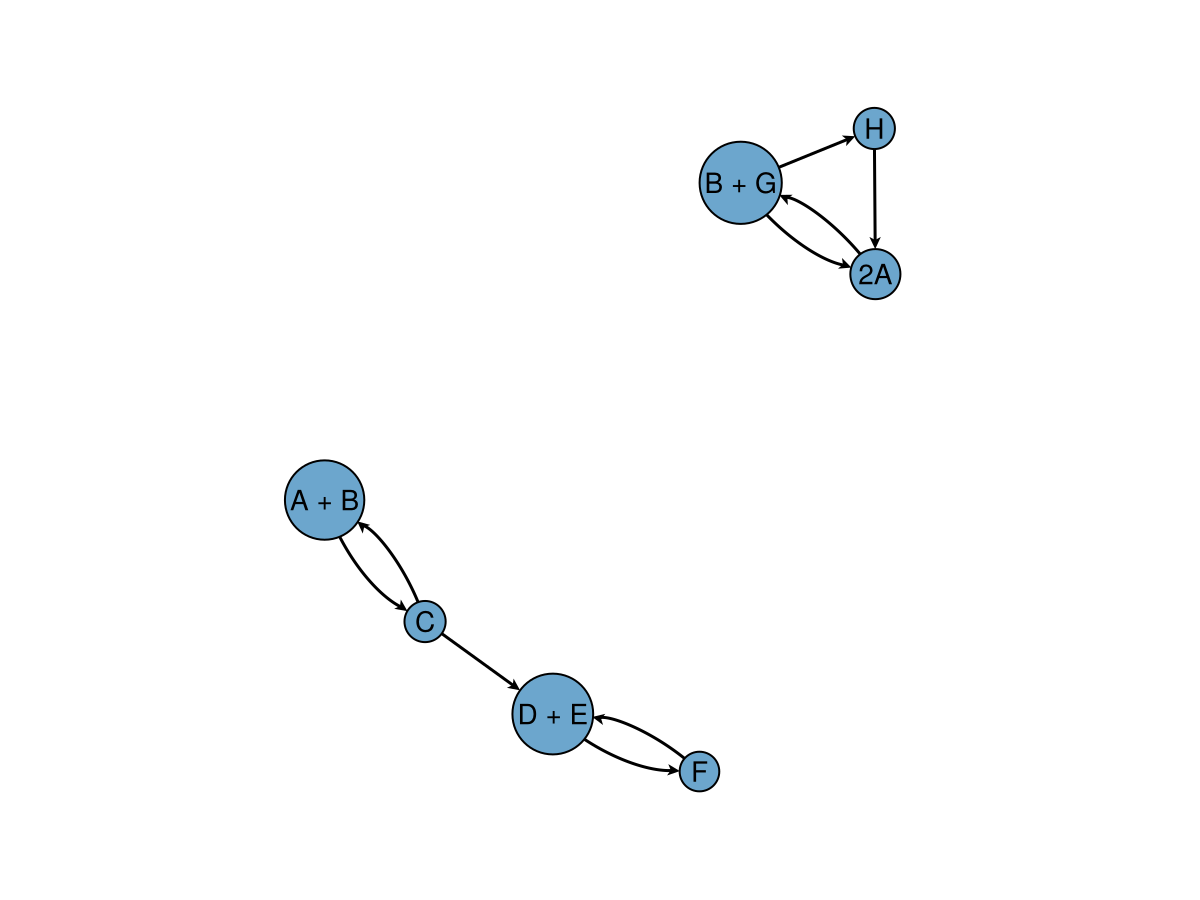

In [118]:
plot_complexes(rn)

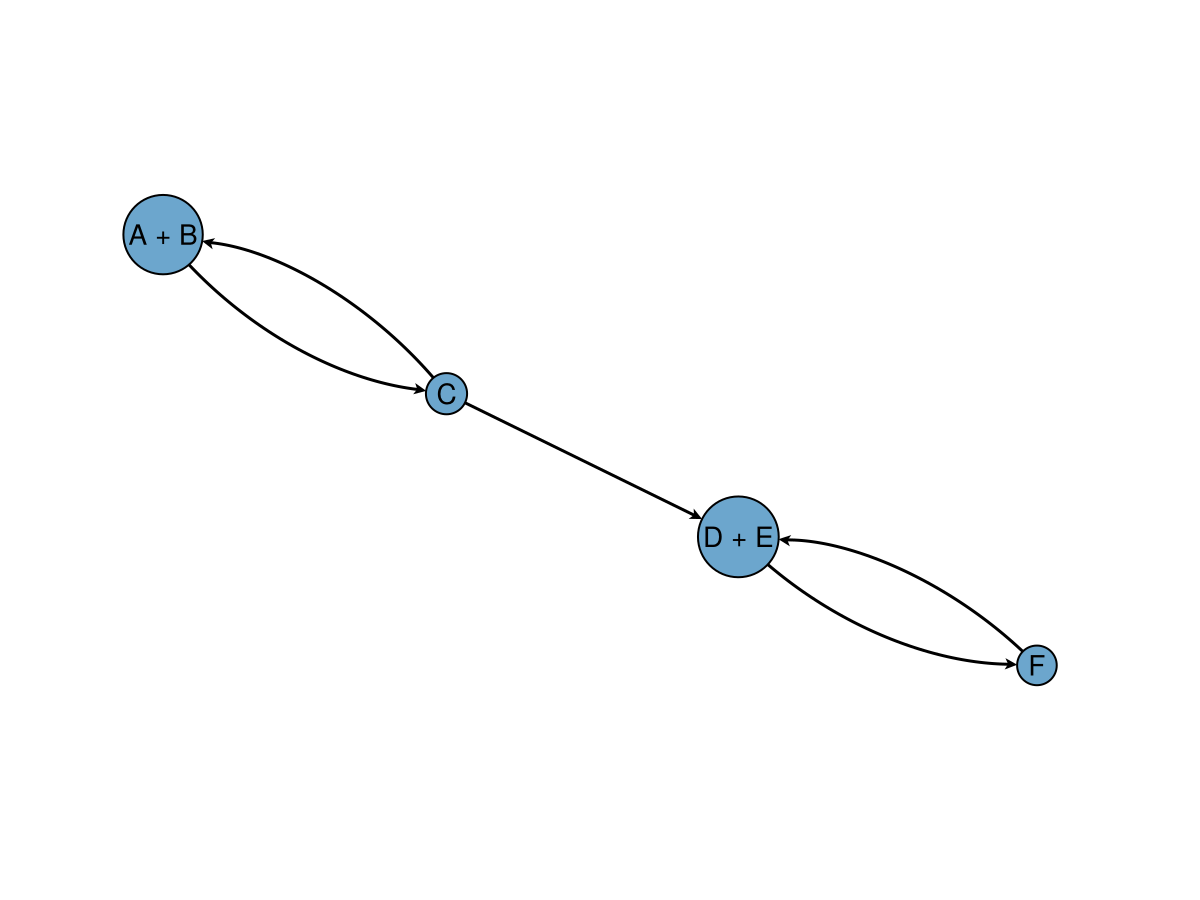

In [116]:
plot_complexes(subnets[1])

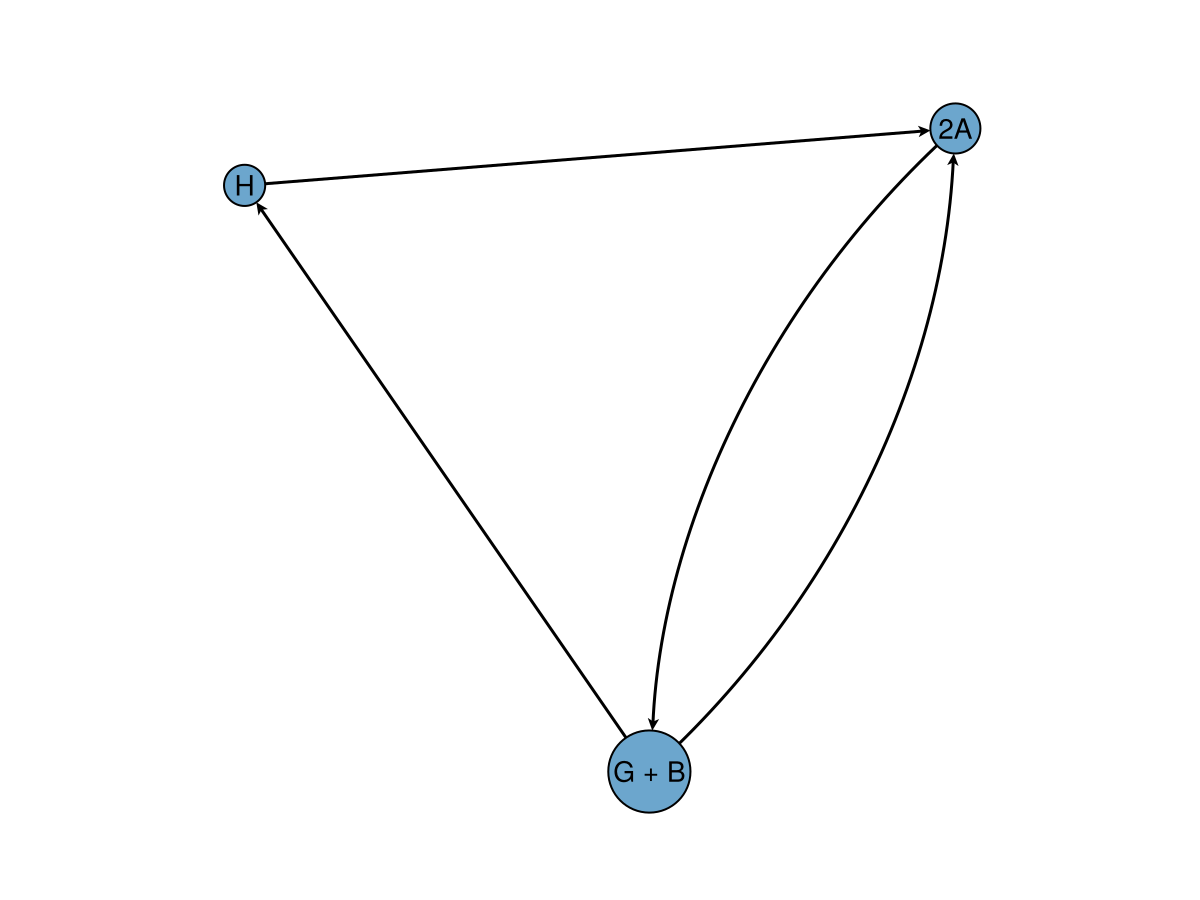

In [117]:
plot_complexes(subnets[2])

### Deficiency
Recall the definition of reaction network deficiency $\delta$
$$
\delta = n - l - s
$$
where $n$ is the \# complexes, $l$ is the \# linkage classes, and $s$ is the rank of the stochiometry matrix.

In [119]:
δ = deficiency(rn)

0

In [120]:
n = length(complexes)
l = length(linkageclasses(rn))
δ == n - l - s

true

In [121]:
# Reversible system
rev = @reaction_network begin
  (k1,k2),A <--> B
  (k3,k4),A + C <--> D
  (k5,k6),D <--> B+E
  (k7,k8),B+E <--> A+C
end
@show isreversible(rev)

# Weakly reversible system
wrev = @reaction_network begin
  (k1,k2),A <--> B
  k3, A + C --> D
  k4, D --> B+E
  k5, B+E --> A+C
end
@show isreversible(wrev)
subnets = subnetworks(wrev)
@show isweaklyreversible(wrev, subnets)

isreversible(rev) = true
isreversible(wrev) = false
isweaklyreversible(wrev, subnets) = true


true

In [122]:
rxs = reactions(rn)
for rx in rxs
    @show rx
    @show ismassaction(rx, rn)
end

rx = k1, A + B --> C
ismassaction(rx, rn) = true
rx = k2, C --> A + B
ismassaction(rx, rn) = true
rx = k3, C --> D + E
ismassaction(rx, rn) = true
rx = k4, D + E --> F
ismassaction(rx, rn) = true
rx = k5, F --> D + E
ismassaction(rx, rn) = true
rx = k6, 2*A --> B + G
ismassaction(rx, rn) = true
rx = k7, B + G --> 2*A
ismassaction(rx, rn) = true
rx = k8, B + G --> H
ismassaction(rx, rn) = true
rx = k9, H --> 2*A
ismassaction(rx, rn) = true


In [123]:
all(rx -> ismassaction(rx, rn), reactions(rn))

true

To satisfy the conditions for deficiency zero theorems, we require reaction networks to be *mass action* and have *deficiency zero*. If such a network is *weakly reversible*, then the ODEs will have exactly one equilibrium solution within each positive stoichiometric compatibility class. Otherwise, the ODEs do not have a valid solution

In [124]:
def0_rn = @reaction_network begin
  (k1,k2),A <--> 2B
  (k3,k4), A + C <--> D
  k5, B+E --> C + D
end
reactioncomplexes(def0_rn)
subnets = subnetworks(def0_rn)
isma = all(rx -> ismassaction(rx,def0_rn), reactions(def0_rn))
def = deficiency(def0_rn)
iswr = isweaklyreversible(def0_rn, subnets)

@show isma
@show def
@show iswr

satisfiesdeficiencyzero(def0_rn)

isma = true
def = 0
iswr = false


false

In [125]:
satisfiesdeficiencyzero(wrev)

true

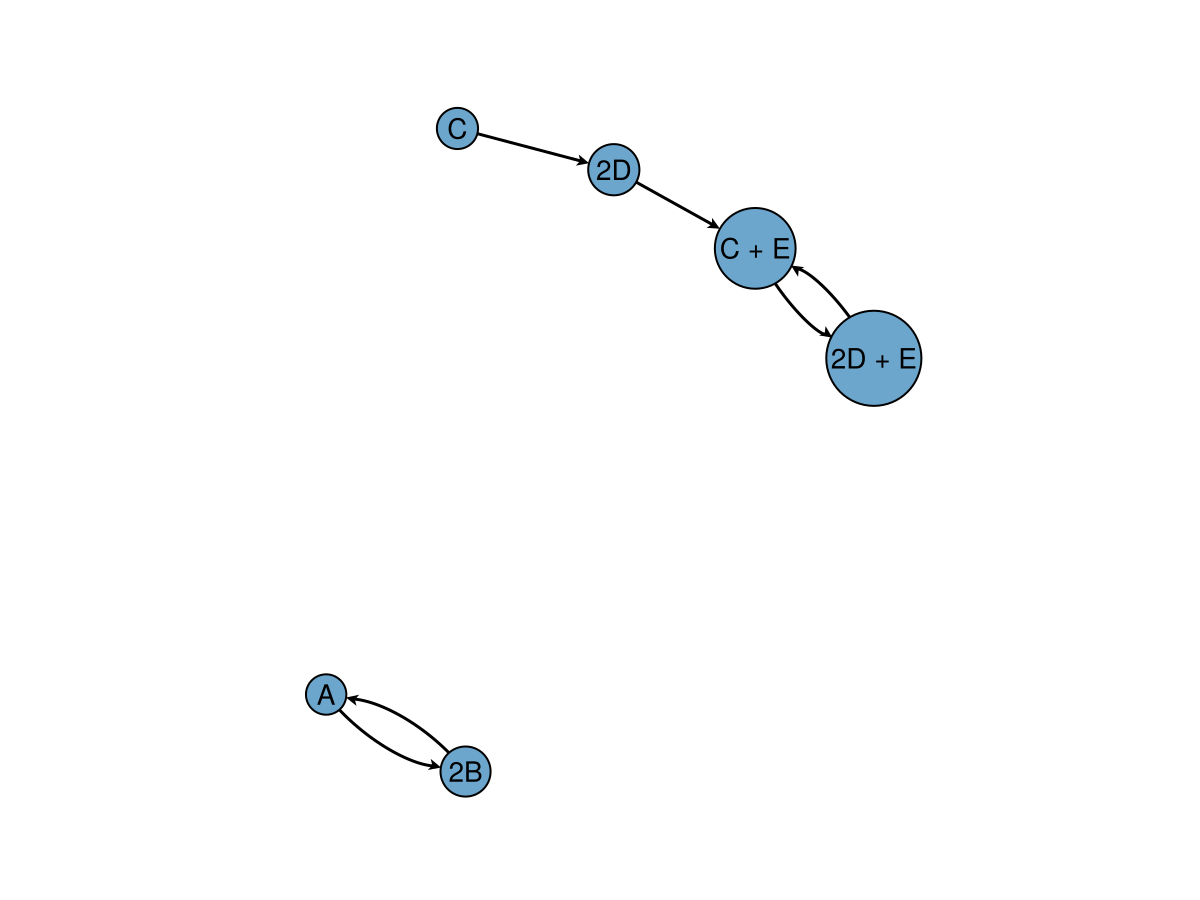

In [127]:
# Deficiency One
def1_network = @reaction_network begin
    (k1, k2), A <--> 2B
    k3, C --> 2D
    k4, 2D --> C + E
    (k5, k6), C + E <--> E + 2D
end
plot_complexes(def1_network)

In [129]:
@show satisfiesdeficiencyone(def1_network)
deficiency(def1_network)

satisfiesdeficiencyone(def1_network) = true


1

## Reaction Network ODEs

There are multiple ways to represent a reaction network as ODEs

### Stoichiometric form
$$
\frac{d\mathbf{x}}{dt} = N\mathbf{v}(\mathbf{x})
$$
where $\mathbf{x}(t)$ is the vector of species, $N$ is the stoichiometric matrix, and $\mathbf{v}(\mathbf{x})$ is the rate law vector.

In [165]:
rn = @reaction_network begin
    k, 2A + 3B --> A + 2C + D
    b, C + D --> 2A + 3B
end

Model ##ReactionSystem#390:
Unknowns (4): see unknowns(##ReactionSystem#390)
  A(t)
  B(t)
  C(t)
  D(t)
Parameters (2): see parameters(##ReactionSystem#390)
  k
  b

In [131]:
N = netstoichmat(rn)

4×2 Matrix{Int64}:
 -1   2
 -3   3
  2  -1
  1  -1

In [132]:
v = oderatelaw.(reactions(rn), combinatoric_ratelaw=false)

2-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 k*(B(t)^3)*(A(t)^2)
 b*D(t)*C(t)

In [133]:
# NB oderatelaw may not be mass action
rx = @reaction hillr(X, α, K, n), 0 --> Y
oderatelaw(rx)

((K^n)*α) / (K^n + X^n)

NB: if `combinatoric_ratelaw=true` then a scaling factor of $1/k!$ is applied where $k$ is the coefficient.

In [139]:
# NB oderatelaw may not be mass action
rx = @reaction β, 3X --> Y
oderatelaw(rx)

(1//6)*(X(t)^3)*β

In [143]:
latexify(N * v)

"\\begin{equation}\n\\left[\n\\begin{array}{c}\n2 b D\\left( t \\right) C\\left( t \\right) - \\left( A\\left( t \\right) \\right)^{2} \\left( B\\left( t \\right) \\right)^{3} k \\\\\n3 b D\\left( t \\right) C\\left( t \\right) - 3 \\left( A\\left( t \\right) \\right)^{2} \\left( B\\left( t \\right) \\ri" ⋯ 24 bytes ⋯ "t( t \\right) C\\left( t \\right) + 2 \\left( A\\left( t \\right) \\right)^{2} \\left( B\\left( t \\right) \\right)^{3} k \\\\\n - b D\\left( t \\right) C\\left( t \\right) + \\left( A\\left( t \\right) \\right)^{2} \\left( B\\left( t \\right) \\right)^{3} k \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

In [144]:
odesys = convert(ODESystem, rn, combinatoric_ratelaws=false)

Model ##ReactionSystem#378:
Equations (4):
  4 standard: see equations(##ReactionSystem#378)
Unknowns (4): see unknowns(##ReactionSystem#378)
  A(t)
  B(t)
  C(t)
  D(t)
Parameters (2): see parameters(##ReactionSystem#378)
  k
  b

### Complex representation

$$
\begin{align*}
    \frac{d\mathbf{x}}{dt} &= N\mathbf{v}(\mathbf{x})\\
    &= YB\mathbf{v}(\mathbf{x})\\
    &= YBK\Phi\\
    &= YA_k\Phi
\end{align*}
$$

In [166]:
rn

Model ##ReactionSystem#390:
Unknowns (4): see unknowns(##ReactionSystem#390)
  A(t)
  B(t)
  C(t)
  D(t)
Parameters (2): see parameters(##ReactionSystem#390)
  k
  b

In [167]:
x = species(rn)

4-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 A(t)
 B(t)
 C(t)
 D(t)

In [168]:
Y = complexstoichmat(rn)

4×3 Matrix{Int64}:
 2  1  0
 3  0  0
 0  2  1
 0  1  1

In [ ]:
# NB: Y' is the transpose of Y
Y' * x

3-element Vector{Any}:
 3B(t) + 2A(t)
 D(t) + A(t) + 2C(t)
 D(t) + C(t)

In [170]:
B = incidencemat(rn)

3×2 Matrix{Int64}:
 -1   1
  1   0
  0  -1

In [176]:
N == Y*B

true

The reaction rate vector can also be defined as
$$
\mathbf{v}(\mathbf{x}) = K\Phi(\mathbf{x})
$$
where $K$ is the *flux matrix* and $\Phi(\mathbf{x})$ is the vector of *monomials* that define the mass action rate laws.

In [172]:
K = fluxmat(rn)

2×3 Matrix{Num}:
 k  0  0
 0  0  b

In [173]:
Φ = massactionvector(rn; combinatoric_ratelaws=false)

3-element Vector{Num}:
  (B(t)^3)*(A(t)^2)
 D(t)*A(t)*(C(t)^2)
          D(t)*C(t)

In [174]:
K * Φ

2-element Vector{Num}:
 k*(B(t)^3)*(A(t)^2)
         b*D(t)*C(t)

Lastly, $A_k = BK$ is the negative of the weighted *Laplacian matrix* of the reaction network.

In [177]:
A_k = laplacianmat(rn)

3×3 Matrix{Num}:
 -k  0   b
  k  0   0
  0  0  -b

## Other useful functions

See the [API docs](https://docs.sciml.ai/Catalyst/stable/api/network_analysis_api/) for more info.

In [178]:
rn = @reaction_network begin
  (k1,k2),A <--> B
  k3, A + C --> D
  k4, D --> B+E
  k5, B+E --> A+C
end

Model ##ReactionSystem#396:
Unknowns (5): see unknowns(##ReactionSystem#396)
  A(t)
  B(t)
  C(t)
  D(t)
  ⋮
Parameters (5): see parameters(##ReactionSystem#396)
  k1
  k2
  k3
  k4
  ⋮

In [179]:
rates = Dict([:k1 => 2.4, :k2 => 4., :k3 => 10., :k4 => 5.5, :k5 => 0.4])
@show iscomplexbalanced(rn, rates)
@show isdetailedbalanced(rn, rates)

iscomplexbalanced(rn, rates) = true
isdetailedbalanced(rn, rates) = false


false

Substrate $S$ and product $P$ stoichiometry matrices for reactions $s \to p$

Note that $N = P - S$

In [159]:
display(substoichmat(rn))
display(prodstoichmat(rn))
display(netstoichmat(rn))

5×5 Matrix{Int64}:
 1  0  1  0  0
 0  1  0  0  1
 0  0  1  0  0
 0  0  0  1  0
 0  0  0  0  1

5×5 Matrix{Int64}:
 0  1  0  0  1
 1  0  0  1  0
 0  0  0  0  1
 0  0  1  0  0
 0  0  0  1  0

5×5 Matrix{Int64}:
 -1   1  -1   0   1
  1  -1   0   1  -1
  0   0  -1   0   1
  0   0   1  -1   0
  0   0   0   1  -1